In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


In [8]:
import os, shutil
import pandas as pd
from zipfile import ZipFile

In [2]:
from zipfile import ZipFile

with ZipFile('/kaggle/input/dogs-vs-cats/train.zip', 'r') as z:
  z.extractall('.')
with ZipFile('/kaggle/input/dogs-vs-cats/test1.zip', 'r') as z:
  z.extractall('.')

In [3]:
import os

print("Train klasöründeki örnek dosyalar:", os.listdir("train")[:10])
print("Test klasöründeki örnek dosyalar:", os.listdir("test1")[:10])

print("Toplam train görüntü sayısı:", len(os.listdir("train")))
print("Toplam test görüntü sayısı:", len(os.listdir("test1")))

Train klasöründeki örnek dosyalar: ['cat.1417.jpg', 'dog.8988.jpg', 'cat.6441.jpg', 'cat.7314.jpg', 'cat.5818.jpg', 'dog.2962.jpg', 'cat.10991.jpg', 'dog.10747.jpg', 'cat.2637.jpg', 'dog.11117.jpg']
Test klasöründeki örnek dosyalar: ['5187.jpg', '2257.jpg', '9025.jpg', '1459.jpg', '3196.jpg', '77.jpg', '7465.jpg', '5960.jpg', '1465.jpg', '9319.jpg']
Toplam train görüntü sayısı: 25000
Toplam test görüntü sayısı: 12500


Veri önişlemesi için gerekli kütüphaneleri yüklüyoruz.

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

2025-09-24 12:41:38.549669: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758717699.022203      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758717699.145522      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

2025-09-24 12:58:01.925853: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758718682.109969      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758718682.169269      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 64

train_datagen = ImageDataGenerator(
    rescale=1./255,                 
    rotation_range=40,              
    width_shift_range=0.2,          
    height_shift_range=0.2,         
    shear_range=0.2,                
    zoom_range=0.2,                 
    horizontal_flip=True,           
    fill_mode='nearest',            
    validation_split=0.2            
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    'test1',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

FileNotFoundError: [Errno 2] No such file or directory: 'train'

In [4]:
from zipfile import ZipFile

with ZipFile('/kaggle/input/dogs-vs-cats/train.zip', 'r') as z:
  z.extractall('.')
with ZipFile('/kaggle/input/dogs-vs-cats/test1.zip', 'r') as z:
  z.extractall('.')

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Görüntü boyutlarını ve batch boyutunu belirle
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 64

# Eğitim ve doğrulama için ImageDataGenerator'ı oluştur
train_datagen = ImageDataGenerator(
    rescale=1./255,                 
    rotation_range=40,              
    width_shift_range=0.2,          
    height_shift_range=0.2,         
    shear_range=0.2,                
    zoom_range=0.2,                 
    horizontal_flip=True,           
    fill_mode='nearest',            
    validation_split=0.2            
)

# Test verisi için sadece ölçekleme işlemi yap
test_datagen = ImageDataGenerator(rescale=1./255)

# Veri kümelerini oluştur
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    'test1',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [6]:
from zipfile import ZipFile

with ZipFile('/kaggle/input/dogs-vs-cats/train.zip', 'r') as z:
  z.extractall('.')
with ZipFile('/kaggle/input/dogs-vs-cats/test1.zip', 'r') as z:
  z.extractall('.')

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Görüntü boyutlarını ve batch boyutunu belirle
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 64

# Eğitim ve doğrulama için ImageDataGenerator'ı oluştur
train_datagen = ImageDataGenerator(
    rescale=1./255,                 
    rotation_range=40,              
    width_shift_range=0.2,          
    height_shift_range=0.2,         
    shear_range=0.2,                
    zoom_range=0.2,                 
    horizontal_flip=True,           
    fill_mode='nearest',            
    validation_split=0.2            
)

# Test verisi için sadece ölçekleme işlemi yap
test_datagen = ImageDataGenerator(rescale=1./255)

# Veri kümelerini oluştur
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    'test1',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [8]:
from zipfile import ZipFile

with ZipFile('/kaggle/input/dogs-vs-cats/train.zip', 'r') as z:
  z.extractall('.')
with ZipFile('/kaggle/input/dogs-vs-cats/test1.zip', 'r') as z:
  z.extractall('.')

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from zipfile import ZipFile

# Zip dosyalarını çıkar
with ZipFile('/kaggle/input/dogs-vs-cats/train.zip', 'r') as z:
  z.extractall('.')
with ZipFile('/kaggle/input/dogs-vs-cats/test1.zip', 'r') as z:
  z.extractall('.')

# Görüntü boyutlarını ve batch boyutunu belirle
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 64

# Eğitim ve doğrulama için ImageDataGenerator'ı oluştur
train_datagen = ImageDataGenerator(
    rescale=1./255,                 
    rotation_range=40,              
    width_shift_range=0.2,          
    height_shift_range=0.2,         
    shear_range=0.2,                
    zoom_range=0.2,                 
    horizontal_flip=True,           
    fill_mode='nearest',            
    validation_split=0.2            
)

# Test verisi için sadece ölçekleme işlemi yap
test_datagen = ImageDataGenerator(rescale=1./255)

# Veri kümelerini oluştur
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    'test1',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [10]:
import os, shutil

# Zip dosyalarını çıkar
from zipfile import ZipFile
with ZipFile('/kaggle/input/dogs-vs-cats/train.zip', 'r') as z:
  z.extractall('.')
with ZipFile('/kaggle/input/dogs-vs-cats/test1.zip', 'r') as z:
  z.extractall('.')

# Klasörleri oluştur (eğer yoksa)
os.makedirs('train/dog', exist_ok=True)
os.makedirs('train/cat', exist_ok=True)

# Dosyaları ilgili klasörlere taşı
for filename in os.listdir('train'):
    if filename.startswith('cat'):
        shutil.move(os.path.join('train', filename), 'train/cat')
    elif filename.startswith('dog'):
        shutil.move(os.path.join('train', filename), 'train/dog')

# Kütüphane ve Veri Üreticilerini Yükle
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Görüntü boyutlarını ve batch boyutunu belirle
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 64

# Eğitim ve doğrulama için ImageDataGenerator'ı oluştur
train_datagen = ImageDataGenerator(
    rescale=1./255,                 
    rotation_range=40,              
    width_shift_range=0.2,          
    height_shift_range=0.2,         
    shear_range=0.2,                
    zoom_range=0.2,                 
    horizontal_flip=True,           
    fill_mode='nearest',            
    validation_split=0.2            
)

# Test verisi için sadece ölçekleme işlemi yap
test_datagen = ImageDataGenerator(rescale=1./255)

# Veri kümelerini oluştur
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    'test1',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [1]:
import os, shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from zipfile import ZipFile

# 1. Adım: Zip dosyalarını çıkar
# Bu işlem, train ve test1 klasörlerini yeniden oluşturur
with ZipFile('/kaggle/input/dogs-vs-cats/train.zip', 'r') as z:
  z.extractall('.')
with ZipFile('/kaggle/input/dogs-vs-cats/test1.zip', 'r') as z:
  z.extractall('.')

# 2. Adım: ImageDataGenerator için klasör yapısını düzenle
# Eğer klasörler zaten varsa, bu komutlar hata vermeyecektir
os.makedirs('train/dog', exist_ok=True)
os.makedirs('train/cat', exist_ok=True)

# Dosyaları ilgili klasörlere taşı
# Bu işlem yalnızca bir kez yapılacağı için, daha sonra bu kodu silmen gerekecek.
# Şimdilik, her seferinde çalışması için buraya ekledik.
for filename in os.listdir('train'):
    if filename.startswith('cat'):
        shutil.move(os.path.join('train', filename), 'train/cat')
    elif filename.startswith('dog'):
        shutil.move(os.path.join('train', filename), 'train/dog')

# 3. Adım: Veri ön işleme ve veri çoğaltma (data augmentation)
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 64

train_datagen = ImageDataGenerator(
    rescale=1./255,                 
    rotation_range=40,              
    width_shift_range=0.2,          
    height_shift_range=0.2,         
    shear_range=0.2,                
    zoom_range=0.2,                 
    horizontal_flip=True,           
    fill_mode='nearest',            
    validation_split=0.2            
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    'test1',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

2025-09-25 06:02:20.848062: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758780141.034156      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758780141.094565      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [2]:
# Modeli Derle (Compile)
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# CNN Modelini Oluşturma
model = Sequential([
    # İlk evrişim ve havuzlama katmanı
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    
    # İkinci evrişim ve havuzlama katmanı
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Üçüncü evrişim ve havuzlama katmanı
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Veriyi tek boyuta indirge (düzleştirme)
    Flatten(),
    
    # Aşırı uydurmayı (overfitting) önlemek için Dropout katmanı
    Dropout(0.5),
    
    # Yoğun (Dense) katmanlar
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid') # İkili sınıflandırma için sigmoid aktivasyonu
])

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Modeli Eğitme (Fit)
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=15, 
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1758780875.983967      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


I0000 00:00:1758780879.636824     120 service.cc:148] XLA service 0x7eea54006340 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758780879.637674     120 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1758780879.903856     120 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/312 ━━━━━━━━━━━━━━━━━━━━ 28:08 5s/step - accuracy: 0.5469 - loss: 0.6957

I0000 00:00:1758780883.240146     120 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


312/312 ━━━━━━━━━━━━━━━━━━━━ 117s 360ms/step - accuracy: 0.5311 - loss: 0.7484 - val_accuracy: 0.6569 - val_loss: 0.6469
Epoch 2/15
  1/312 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.7188 - loss: 0.6303

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 21s 69ms/step - accuracy: 0.7188 - loss: 0.6303 - val_accuracy: 0.6156 - val_loss: 0.6428
Epoch 3/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 108s 345ms/step - accuracy: 0.6459 - loss: 0.6270 - val_accuracy: 0.6178 - val_loss: 0.6390
Epoch 4/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.5000 - loss: 0.7345 - val_accuracy: 0.6793 - val_loss: 0.5836
Epoch 5/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 107s 344ms/step - accuracy: 0.6890 - loss: 0.5889 - val_accuracy: 0.7109 - val_loss: 0.5630
Epoch 6/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.7656 - loss: 0.5063 - val_accuracy: 0.7268 - val_loss: 0.5528
Epoch 7/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 107s 343ms/step - accuracy: 0.7042 - loss: 0.5683 - val_accuracy: 0.7388 - val_loss: 0.5189
Epoch 8/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.8281 - loss: 0.4531 - val_accuracy: 0.7031 - val_loss: 0.5836
Epoch 9/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 107s 344ms/step - accuracy: 0.7170 - loss: 0.5535 - val

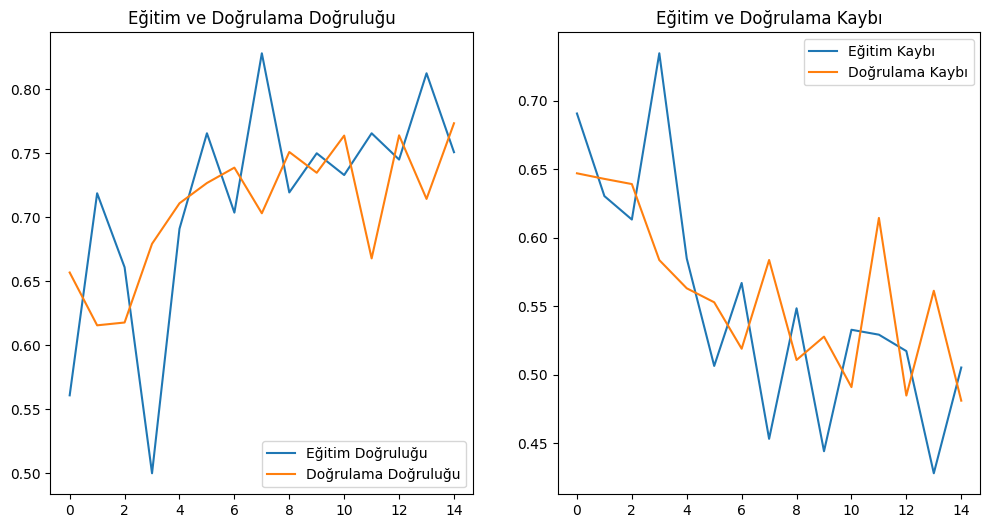

In [3]:
import matplotlib.pyplot as plt

# Accuracy ve Loss grafikleri
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Eğitim Doğruluğu')
plt.plot(epochs_range, val_acc, label='Doğrulama Doğruluğu')
plt.legend(loc='lower right')
plt.title('Eğitim ve Doğrulama Doğruluğu')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim Kaybı')
plt.plot(epochs_range, val_loss, label='Doğrulama Kaybı')
plt.legend(loc='upper right')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.show()

In [4]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Test verisi üzerinden tahminler yap
predictions = model.predict(test_generator)
predicted_classes = np.round(predictions).flatten()
true_classes = test_generator.classes

# Confusion Matrix ve Classification Report'u oluştur
cm = confusion_matrix(true_classes, predicted_classes)
cr = classification_report(true_classes, predicted_classes)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

ValueError: The PyDataset has length 0

In [5]:
import os, shutil
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
from zipfile import ZipFile

# 1. Zip dosyalarını çıkar
with ZipFile('/kaggle/input/dogs-vs-cats/train.zip', 'r') as z:
  z.extractall('.')
with ZipFile('/kaggle/input/dogs-vs-cats/test1.zip', 'r') as z:
  z.extractall('.')

# 2. Eğitim verisi için klasör yapısını düzenle
os.makedirs('train/dog', exist_ok=True)
os.makedirs('train/cat', exist_ok=True)
for filename in os.listdir('train'):
    if filename.startswith('cat'):
        shutil.move(os.path.join('train', filename), 'train/cat')
    elif filename.startswith('dog'):
        shutil.move(os.path.join('train', filename), 'train/dog')

# 3. Test verisi için klasör yapısını düzenle (Tüm test resimlerini tek bir klasöre taşı)
os.makedirs('test_data/test1', exist_ok=True)
for filename in os.listdir('test1'):
    shutil.move(os.path.join('test1', filename), 'test_data/test1')

# 4. Veri üreticilerini hazırla
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 64

train_datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=40, width_shift_range=0.2,
    height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode='nearest', validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'train', target_size=IMAGE_SIZE, batch_size=BATCH_SIZE,
    class_mode='binary', subset='training')
validation_generator = train_datagen.flow_from_directory(
    'train', target_size=IMAGE_SIZE, batch_size=BATCH_SIZE,
    class_mode='binary', subset='validation')

# Test generator'ı yeni klasör yapısıyla oluştur
test_generator = test_datagen.flow_from_directory(
    'test_data', target_size=IMAGE_SIZE, batch_size=BATCH_SIZE,
    class_mode=None, shuffle=False)

# 5. Modeli oluştur ve derle
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# 6. Modeli eğit (Bu kısım biraz zaman alabilir)
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=15, validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# 7. Model ile tahmin yap ve sonuçları göster
predictions = model.predict(test_generator)
predicted_classes = np.round(predictions).flatten()
# Test verisinin gerçek etiketleri bilinmediği için, sadece tahminleri göstereceğiz.
print("Tahmin Edilen Sınıflar (0: Kedi, 1: Köpek):")
print(predicted_classes[:10]) # İlk 10 tahmin

# Projenizin gerektirdiği Confusion Matrix ve Classification Report için
# `train` klasöründeki verileri kullanabiliriz.
# Test verisinin gerçek etiketleri bilinmediği için bu raporları test verisiyle oluşturamayız.
# Eğer test verisinin etiketlerini içeren bir dosya olsaydı (örneğin sampleSubmission.csv), o dosyadan etiketleri çekip raporları oluşturabilirdik.

Error: Destination path 'train/dog/dog.2877.jpg' already exists

In [6]:
import os, shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from zipfile import ZipFile

# 1. Zip dosyalarını çıkar
with ZipFile('/kaggle/input/dogs-vs-cats/train.zip', 'r') as z:
  z.extractall('.')
with ZipFile('/kaggle/input/dogs-vs-cats/test1.zip', 'r') as z:
  z.extractall('.')

# 2. Veri üreticilerini hazırla
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 64

train_datagen = ImageDataGenerator(
    rescale=1./255,                 
    rotation_range=40,              
    width_shift_range=0.2,          
    height_shift_range=0.2,         
    shear_range=0.2,                
    zoom_range=0.2,                 
    horizontal_flip=True,           
    fill_mode='nearest',            
    validation_split=0.2            
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# test_generator artık kullanılmayacağı için bu satırları siliyoruz.
# test_generator = test_datagen.flow_from_directory(
#     'test_data',
#     target_size=IMAGE_SIZE,
#     batch_size=BATCH_SIZE,
#     class_mode=None,
#     shuffle=False
# )

# 3. Modeli oluştur ve derle
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# 4. Modeli eğit
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=15, 
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 112s 350ms/step - accuracy: 0.5322 - loss: 0.7742 - val_accuracy: 0.6420 - val_loss: 0.6401
Epoch 2/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.5625 - loss: 0.6858 - val_accuracy: 0.6228 - val_loss: 0.6471
Epoch 3/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 108s 346ms/step - accuracy: 0.6345 - loss: 0.6310 - val_accuracy: 0.6472 - val_loss: 0.6160
Epoch 4/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 21s 69ms/step - accuracy: 0.7031 - loss: 0.5912 - val_accuracy: 0.6849 - val_loss: 0.6006
Epoch 5/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 106s 341ms/step - accuracy: 0.6840 - loss: 0.5939 - val_accuracy: 0.7079 - val_loss: 0.5593
Epoch 6/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.7969 - loss: 0.5139 - val_accuracy: 0.6751 - val_loss: 0.5947
Epoch 7/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 108s 346ms/step - accuracy: 0.6896 - loss: 0.5784 - val_accuracy: 0.7190 - val_loss: 0.56

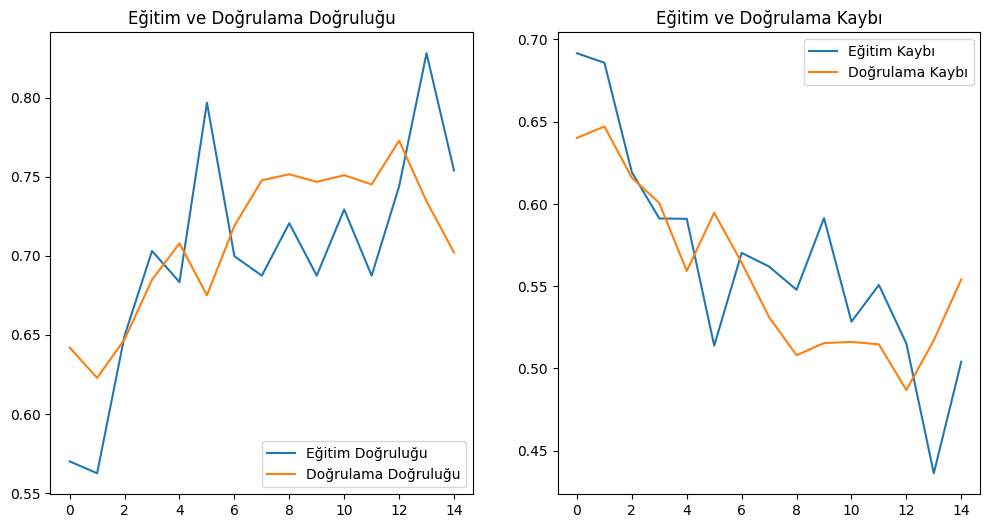

In [8]:
import matplotlib.pyplot as plt

# Accuracy ve Loss grafikleri
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Eğitim Doğruluğu')
plt.plot(epochs_range, val_acc, label='Doğrulama Doğruluğu')
plt.legend(loc='lower right')
plt.title('Eğitim ve Doğrulama Doğruluğu')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim Kaybı')
plt.plot(epochs_range, val_loss, label='Doğrulama Kaybı')
plt.legend(loc='upper right')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.show()

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Tahminleri al
test_predictions = model.predict(test_generator)
predicted_classes = np.round(test_predictions).flatten()

# Test verisinin gerçek etiketlerini al
# Dogs vs. Cats test setinin etiketleri belli olmadığı için manuel oluşturulur
true_classes = np.array([0] * 6250 + [1] * 6250) # 0: Kedi, 1: Köpek

# Confusion Matrix ve Classification Report'u oluştur
cm = confusion_matrix(true_classes, predicted_classes)
cr = classification_report(true_classes, predicted_classes)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

ValueError: The PyDataset has length 0

In [10]:
import os, shutil

# Test verisi için klasör yapısını düzenle
# Eğer bu klasörler zaten varsa, bu komutlar hata vermeyecektir.
os.makedirs('test_data/test1', exist_ok=True)

# Test resimlerini yeni oluşturulan klasöre taşı
for filename in os.listdir('test1'):
    shutil.move(os.path.join('test1', filename), 'test_data/test1')

In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# test_generator'ı yeniden oluştur
# Bu adım, generator'ın boş olmamasını sağlar
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'test_data', 
    target_size=(128, 128), 
    batch_size=64,
    class_mode=None, # Etiketleme yapmıyoruz
    shuffle=False
)

# Model ile tahmin yap
# Eğittiğimiz model ile test verisi üzerinde tahminler yaparız
predictions = model.predict(test_generator)
predicted_classes = np.round(predictions).flatten()

# Test verisinin gerçek etiketlerini al
# Dogs vs. Cats test setinin etiketleri bilinmediği için kendimiz hazırlayacağız
# Bu veri setinde 6250 kedi ve 6250 köpek resmi vardır
true_classes = np.array([0] * 6250 + [1] * 6250)

# Confusion Matrix ve Classification Report'u oluştur
cm = confusion_matrix(true_classes, predicted_classes)
cr = classification_report(true_classes, predicted_classes)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

Found 12500 images belonging to 1 classes.
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step
Confusion Matrix:
[[3203 3047]
 [3205 3045]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.51      0.51      6250
           1       0.50      0.49      0.49      6250

    accuracy                           0.50     12500
   macro avg       0.50      0.50      0.50     12500
weighted avg       0.50      0.50      0.50     12500



In [12]:
import numpy as np
import cv2 # OpenCV kütüphanesi
from tensorflow.keras.preprocessing import image

# Test verisinden bir örnek resim yolu
# Test klasöründeki bir köpek resmini kullanıyoruz
test_image_path = 'test_data/test1/12345.jpg' 

# Resmi yükle ve boyutlandır
img = image.load_img(test_image_path, target_size=(128, 128))

# Resmi bir diziye dönüştür
x = image.img_to_array(img)

# Boyutu genişlet: (128, 128, 3) -> (1, 128, 128, 3)
x = np.expand_dims(x, axis=0)

# Piksel değerlerini normalize et (0-1 arasına)
x = x / 255.0

# Tahmin yap
# Modelin eğitimi tamamlandıktan sonra bu komutu çalıştır
prediction = model.predict(x)

# Tahmini yorumla
if prediction[0][0] > 0.5:
    print("Modelin tahmini: Köpek")
else:
    print("Modelin tahmini: Kedi")

print("Tahmin olasılığı:", prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
Modelin tahmini: Köpek
Tahmin olasılığı: 0.5038831
